## 参考文档
https://www.nltk.org/

In [29]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re
import torch

from gensim import corpora, models, similarities
from gensim.models.word2vec import Word2Vec
from nltk.corpus import treebank
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [27]:
## The Old Man and the Sea 文本处理

# 读取文本文件
file = open(r"F:\The Old Man and The Sea.txt","r")
text = file.read()
file.close()


# 文本分句
sentences = nltk.sent_tokenize(text)

# 文本分词
corpus = nltk.word_tokenize(str(sentences))

# 停用词过滤
stop_words = stopwords.words('english')
for w in ['!',',','.','?','-s','-ly','</s>','s','``','\'','\"','[',']','','asiaing.com','ma','-']:
    stop_words.append(w)
filtered_words = [word for word in corpus if word.lower() not in stop_words]

# 单词前后缀删除
for i in range(len(filtered_words)):
    filtered_words[i] = filtered_words[i].strip()
    filtered_words[i] = filtered_words[i].strip('\'')
    filtered_words[i] = filtered_words[i].strip('\n')
    filtered_words[i] = filtered_words[i].strip('\\n')
    filtered_words[i] = filtered_words[i].strip('\\')
    filtered_words[i] = filtered_words[i].strip('/')

# 二次过滤
filtered_words = [word for word in filtered_words if word.lower() not in stop_words]

# 词频统计
freq_dist = nltk.FreqDist(filtered_words)

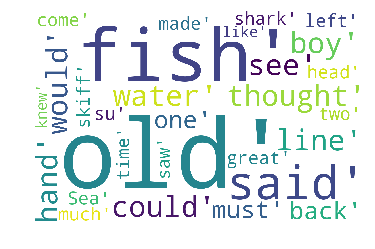

In [28]:
# 生成词云
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(str(freq_dist.most_common(30)))

# 绘制图片
plt.imshow(wordcloud)

# 消除坐标轴
plt.axis("off")

# 展示图片
plt.show()

# 保存图片
wordcloud.to_file('old_man_and_sea_wordcloud.jpg')

In [12]:
nltk.download('punkt')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [14]:
## tokenize 
## 分词工具 nltk.word_tokenize(sent)
sentence = """All I want to do is to make you proud."""
tokens = nltk.word_tokenize(sentence)
tokens

['All', 'I', 'want', 'to', 'do', 'is', 'to', 'make', 'you', 'proud', '.']

# nltk 词性大全学习
https://blog.csdn.net/pengjian444/article/details/81143983

In [16]:
## tagging
##词性标注工具nltk.pos_tag(tokens)  
tagged = nltk.pos_tag(tokens)
tagged[:]

[('All', 'DT'),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('do', 'VB'),
 ('is', 'VBZ'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('you', 'PRP'),
 ('proud', 'JJ'),
 ('.', '.')]

In [18]:
## 确认命名实体 named entities
## nltk.chunk.ne_chunk(tagged)
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  All/DT
  I/PRP
  want/VBP
  to/TO
  do/VB
  is/VBZ
  to/TO
  make/VB
  you/PRP
  proud/JJ
  ./.)


In [22]:
## parsing tree 语法分析树
## treebank.parsed_sents()
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()